In [1]:
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

from munch import Munch
from torchvision import transforms

In [2]:
stargan_dataset_dir = '/home/jupyter/datasphere/datasets/stargan_datasets/stargan_datasets/'

style_dir_name = 'style_dataset'
gim_dir_name = 'generated_image_with_mask_dataset'

style_dir = os.path.join(stargan_dataset_dir, style_dir_name)
gim_dir = os.path.join(stargan_dataset_dir, gim_dir_name)

In [3]:
from custom_data_loader import (StyleDataset, 
                                BasicGIMDataset, 
                                GIMDataset, ReferenceDataset, 
                                one_item_loader_1, 
                                one_item_loader_2, 
                                get_loader, 
                                InputFetcher)

In [4]:
##############################################################################################
###################################### STYLE TRANSFORM #######################################
##############################################################################################
img_size = 256
prob = 1

crop = transforms.RandomResizedCrop(
        img_size, scale=[0.8, 1.0], ratio=[0.9, 1.1], antialias=True)

rand_crop = transforms.Lambda(
        lambda x: crop(x) if random.random() < prob else x)

style_transform = transforms.Compose([
    rand_crop,
    transforms.Resize([img_size, img_size]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])

def style_unnormalize(img):
    return img * 0.5 + 0.5

style dataset out shape:  torch.Size([9, 256, 256])
img min:  -1.0
img max:  1.0
mask min:  0.0
mask max:  0.0


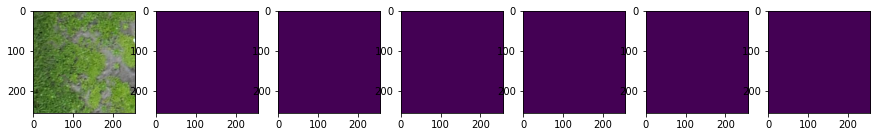

In [5]:
i = random.randint(0, 100)
########################### CHECK STYLE DATASET ###################################
style_dataset = StyleDataset(style_dir, 
                             transform=style_transform, 
                             with_empty_mask=True, 
                             channels=6)
style_dataset_item = style_dataset[i][0]

print('style dataset out shape: ', style_dataset_item.shape)
print('img min: ', style_dataset_item[:3, :, :].min().item())
print('img max: ', style_dataset_item[:3, :, :].max().item())
print('mask min: ', style_dataset_item[3:, :, :].min().item())
print('mask max: ', style_dataset_item[3:, :, :].max().item())

style_dataset_item = style_unnormalize(style_dataset_item).permute(1, 2, 0)
_, axes = plt.subplots(ncols=7, figsize=(15, 5))
axes[0].imshow(style_dataset_item[:, :, :3])
axes[1].imshow(style_dataset_item[:, :, 3:4])
axes[2].imshow(style_dataset_item[:, :, 4:5])
axes[3].imshow(style_dataset_item[:, :, 5:6])
axes[4].imshow(style_dataset_item[:, :, 6:7])
axes[5].imshow(style_dataset_item[:, :, 7:8])
axes[6].imshow(style_dataset_item[:, :, 8:]);

In [6]:
##############################################################################################
###################################### GIM TRANSFORM #########################################
##############################################################################################
img_size = 256
prob = 1

crop = transforms.RandomResizedCrop(
        img_size, scale=[0.8, 1.0], ratio=[0.9, 1.1], antialias=True)

rand_crop = transforms.Lambda(
        lambda x: crop(x) if random.random() < prob else x)

gim_transform = transforms.Compose([
    rand_crop,
    transforms.Resize([img_size, img_size]),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=255 / 2, std=255 / 2)
])


def gim_unnormalize(img):
    return (img * 255 / 2 + 255 / 2).to(torch.uint8)

basic gim dataset out shape:  torch.Size([9, 256, 256])
img min:  tensor(-1., dtype=torch.float64)
img max:  tensor(0.9740, dtype=torch.float64)
mask min:  tensor(-1., dtype=torch.float64)
mask max:  tensor(0.9765, dtype=torch.float64)


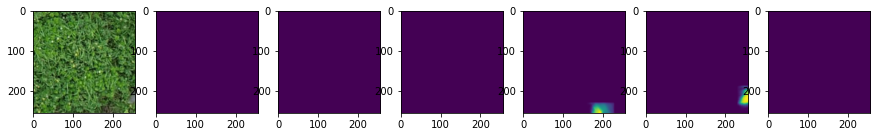

gim dataset out shape:  torch.Size([4, 256, 256])
min:  tensor(-1., dtype=torch.float64)
max:  tensor(0.9796, dtype=torch.float64)
min:  tensor(0., dtype=torch.float64)
max:  tensor(1., dtype=torch.float64)


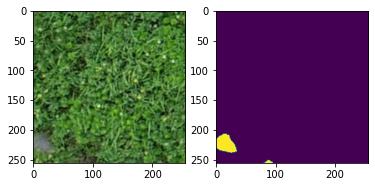

In [7]:
########################### CHECK BASIC GIM DATASET #############################
i = random.randint(0, 100)
basic_gim_dataset = BasicGIMDataset(root=gim_dir, formats=['npy'], transform=gim_transform)
basic_gim_dataset_item = basic_gim_dataset[i][0]
print('basic gim dataset out shape: ', basic_gim_dataset_item.shape)
print('img min: ', basic_gim_dataset_item[:3, :, :].min())
print('img max: ', basic_gim_dataset_item[:3, :, :].max())
print('mask min: ', basic_gim_dataset_item[3:, :, :].min())
print('mask max: ', basic_gim_dataset_item[3:, :, :].max())

basic_gim_dataset_item = gim_unnormalize(basic_gim_dataset_item).permute(1, 2, 0)
_, axes = plt.subplots(ncols=7, figsize=(15, 5))
axes[0].imshow(basic_gim_dataset_item[:, :, :3])
axes[1].imshow(basic_gim_dataset_item[:, :, 3:4])
axes[2].imshow(basic_gim_dataset_item[:, :, 4:5])
axes[3].imshow(basic_gim_dataset_item[:, :, 5:6])
axes[4].imshow(basic_gim_dataset_item[:, :, 6:7])
axes[5].imshow(basic_gim_dataset_item[:, :, 7:8])
axes[6].imshow(basic_gim_dataset_item[:, :, 8:9]);
plt.show()


# ########################### CHECK GIM DATASET ###################################
gim_dataset = GIMDataset(root=gim_dir, formats=['npy'], th=0.5, transform=gim_transform)
gim_dataset_item = gim_dataset[i][0]
print('gim dataset out shape: ', gim_dataset_item.shape)
print('min: ', gim_dataset_item[:3, :, :].min())
print('max: ', gim_dataset_item[:3, :, :].max())
print('min: ', gim_dataset_item[3:, :, :].min())
print('max: ', gim_dataset_item[3:, :, :].max())

gim_dataset_item = gim_unnormalize(gim_dataset_item).permute(1, 2, 0)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(gim_dataset_item[:, :, :3])
axes[1].imshow(gim_dataset_item[:, :, 3:4]);
plt.show()

reference style style 1 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1.)
img max:  tensor(0.7098)
mask min:  tensor(0.)
mask max:  tensor(0.)
reference style style 2 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-0.9922)
img max:  tensor(0.5451)
mask min:  tensor(0.)
mask max:  tensor(0.)


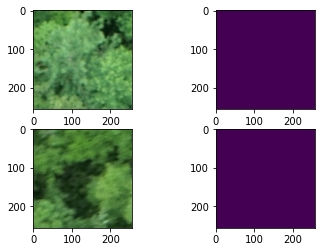

In [8]:
########################### CHECK REFERENCE DATASET on style style images #############################
reference_style_style_dataset = ReferenceDataset(
    root_1=style_dir,
    root_2=style_dir,
    formats_1=['png', 'jpg', 'jpeg', 'JPG'],
    formats_2=['png', 'jpg', 'jpeg', 'JPG'],
    one_item_loader_1=lambda fname: one_item_loader_1(fname,
                                                      transform=style_transform,
                                                      with_empty_mask=True,
                                                      channels=1),
    one_item_loader_2=lambda fname: one_item_loader_1(fname,
                                                      transform=style_transform,
                                                      with_empty_mask=True,
                                                      channels=1)
)
reference_style_style_dataset_item_1 = reference_style_style_dataset[0][0]
reference_style_style_dataset_item_2 = reference_style_style_dataset[0][1]

print('reference style style 1 dataset: out shape: ', reference_style_style_dataset_item_1.shape)
print('img min: ', reference_style_style_dataset_item_1[:3, :, :].min())
print('img max: ', reference_style_style_dataset_item_1[:3, :, :].max())
print('mask min: ', reference_style_style_dataset_item_1[3:, :, :].min())
print('mask max: ', reference_style_style_dataset_item_1[3:, :, :].max())

print('reference style style 2 dataset: out shape: ', reference_style_style_dataset_item_2.shape)
print('img min: ', reference_style_style_dataset_item_2[:3, :, :].min())
print('img max: ', reference_style_style_dataset_item_2[:3, :, :].max())
print('mask min: ', reference_style_style_dataset_item_2[3:, :, :].min())
print('mask max: ', reference_style_style_dataset_item_2[3:, :, :].max())

reference_style_style_dataset_item_1 = style_unnormalize(
    reference_style_style_dataset_item_1).permute(1, 2, 0)
reference_style_style_dataset_item_2 = style_unnormalize(
    reference_style_style_dataset_item_2).permute(1, 2, 0)
_, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(reference_style_style_dataset_item_1[:, :, :3])
axes[0, 1].imshow(reference_style_style_dataset_item_1[:, :, 3:4])
axes[1, 0].imshow(reference_style_style_dataset_item_2[:, :, :3])
axes[1, 1].imshow(reference_style_style_dataset_item_2[:, :, 3:4])
plt.show()

reference gim gim 1 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1., dtype=torch.float64)
img max:  tensor(0.9721, dtype=torch.float64)
mask min:  tensor(0., dtype=torch.float64)
mask max:  tensor(1., dtype=torch.float64)
reference gim gim 2 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1., dtype=torch.float64)
img max:  tensor(0.9983, dtype=torch.float64)
mask min:  tensor(0., dtype=torch.float64)
mask max:  tensor(1., dtype=torch.float64)


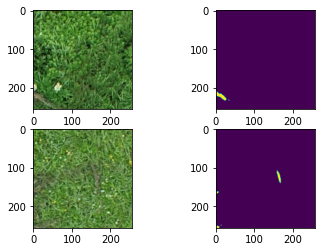

In [9]:
########################### CHECK REFERENCE DATASET on gim gim images #############################
reference_gim_gim_dataset = ReferenceDataset(
    root_1=gim_dir,
    root_2=gim_dir,
    formats_1=['npy'],
    formats_2=['npy'],
    one_item_loader_1=lambda fname: one_item_loader_2(fname,
                                                      transform=gim_transform,
                                                      th=0.5),
    one_item_loader_2=lambda fname: one_item_loader_2(fname,
                                                      transform=gim_transform,
                                                      th=0.5)
)
reference_gim_gim_dataset_item_1 = reference_gim_gim_dataset[0][0]
reference_gim_gim_dataset_item_2 = reference_gim_gim_dataset[0][1]

print('reference gim gim 1 dataset: out shape: ', reference_gim_gim_dataset_item_1.shape)
print('img min: ', reference_gim_gim_dataset_item_1[:3, :, :].min())
print('img max: ', reference_gim_gim_dataset_item_1[:3, :, :].max())
print('mask min: ', reference_gim_gim_dataset_item_1[3:, :, :].min())
print('mask max: ', reference_gim_gim_dataset_item_1[3:, :, :].max())

print('reference gim gim 2 dataset: out shape: ', reference_gim_gim_dataset_item_2.shape)
print('img min: ', reference_gim_gim_dataset_item_2[:3, :, :].min())
print('img max: ', reference_gim_gim_dataset_item_2[:3, :, :].max())
print('mask min: ', reference_gim_gim_dataset_item_2[3:, :, :].min())
print('mask max: ', reference_gim_gim_dataset_item_2[3:, :, :].max())

reference_gim_gim_dataset_item_1 = gim_unnormalize(
    reference_gim_gim_dataset_item_1).permute(1, 2, 0)
reference_gim_gim_dataset_item_2 = gim_unnormalize(
    reference_gim_gim_dataset_item_2).permute(1, 2, 0)
_, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(reference_gim_gim_dataset_item_1[:, :, :3])
axes[0, 1].imshow(reference_gim_gim_dataset_item_1[:, :, 3:4])
axes[1, 0].imshow(reference_gim_gim_dataset_item_2[:, :, :3])
axes[1, 1].imshow(reference_gim_gim_dataset_item_2[:, :, 3:4])
plt.show()

In [10]:
########################### CHECK REFERENCE DATASET on gim style images #############################
i = random.randint(0, 100)
reference_gim_style_dataset = ReferenceDataset(
    root_1=gim_dir,
    root_2=style_dir,
    formats_1=['npy'],
    formats_2=['png', 'jpg', 'jpeg', 'JPG'],
    one_item_loader_1=lambda fname: one_item_loader_2(fname,
                                                      transform=gim_transform,
                                                      th=0.5),
    one_item_loader_2=lambda fname: one_item_loader_1(fname,
                                                      transform=style_transform,
                                                      with_empty_mask=True,
                                                      channels=1)
)
reference_gim_style_dataset_item_1 = reference_gim_style_dataset[i][0]
reference_gim_style_dataset_item_2 = reference_gim_style_dataset[i][1]

print('reference gim style 1 dataset: out shape: ', reference_gim_style_dataset_item_1.shape)
print('img min: ', reference_gim_style_dataset_item_1[:3, :, :].min())
print('img max: ', reference_gim_style_dataset_item_1[:3, :, :].max())
print('mask min: ', reference_gim_style_dataset_item_1[3:, :, :].min())
print('mask max: ', reference_gim_style_dataset_item_1[3:, :, :].max())

print('reference gim style 2 dataset: out shape: ', reference_gim_style_dataset_item_2.shape)
print('img min: ', reference_gim_style_dataset_item_2[:3, :, :].min())
print('img max: ', reference_gim_style_dataset_item_2[:3, :, :].max())
print('mask min: ', reference_gim_style_dataset_item_2[3:, :, :].min())
print('mask max: ', reference_gim_style_dataset_item_2[3:, :, :].max())

reference_gim_style_dataset_item_1 = gim_unnormalize(
    reference_gim_style_dataset_item_1).permute(1, 2, 0)
reference_gim_style_dataset_item_2 = style_unnormalize(
    reference_gim_style_dataset_item_2).permute(1, 2, 0)
_, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(reference_gim_style_dataset_item_1[:, :, :3])
axes[0, 1].imshow(reference_gim_style_dataset_item_1[:, :, 3:4])
axes[1, 0].imshow(reference_gim_style_dataset_item_2[:, :, :3])
axes[1, 1].imshow(reference_gim_style_dataset_item_2[:, :, 3:4])
plt.show()

reference gim style 1 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1., dtype=torch.float64)
img max:  tensor(0.8084, dtype=torch.float64)
mask min:  tensor(0., dtype=torch.float64)
mask max:  tensor(0., dtype=torch.float64)
reference gim style 2 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1.)
img max:  tensor(0.5608)
mask min:  tensor(0.)
mask max:  tensor(0.)


In [11]:
########################### CHECK REFERENCE DATASET on style gim images #############################
i = random.randint(0, 100)
reference_style_gim_dataset = ReferenceDataset(
    root_1=style_dir,
    root_2=gim_dir,
    formats_1=['png', 'jpg', 'jpeg', 'JPG'],
    formats_2=['npy'],
    one_item_loader_1=lambda fname: one_item_loader_1(fname,
                                                      transform=style_transform,
                                                      with_empty_mask=True,
                                                      channels=1),
    one_item_loader_2=lambda fname: one_item_loader_2(fname,
                                                      transform=gim_transform,
                                                      th=0.5)
)
reference_style_gim_dataset_item_1 = reference_style_gim_dataset[i][0]
reference_style_gim_dataset_item_2 = reference_style_gim_dataset[i][1]

print('reference style gim 1 dataset: out shape: ', reference_style_gim_dataset_item_1.shape)
print('img min: ', reference_style_gim_dataset_item_1[:3, :, :].min())
print('img max: ', reference_style_gim_dataset_item_1[:3, :, :].max())
print('mask min: ', reference_style_gim_dataset_item_1[3:, :, :].min())
print('mask max: ', reference_style_gim_dataset_item_1[3:, :, :].max())

print('reference style gim 2 dataset: out shape: ', reference_style_gim_dataset_item_2.shape)
print('img min: ', reference_style_gim_dataset_item_2[:3, :, :].min())
print('img max: ', reference_style_gim_dataset_item_2[:3, :, :].max())
print('mask min: ', reference_style_gim_dataset_item_2[3:, :, :].min())
print('mask max: ', reference_style_gim_dataset_item_2[3:, :, :].max())

reference_style_gim_dataset_item_1 = style_unnormalize(
    reference_style_gim_dataset_item_1).permute(1, 2, 0)
reference_style_gim_dataset_item_2 = gim_unnormalize(
    reference_style_gim_dataset_item_2).permute(1, 2, 0)
_, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(reference_style_gim_dataset_item_1[:, :, :3])
axes[0, 1].imshow(reference_style_gim_dataset_item_1[:, :, 3:4])
axes[1, 0].imshow(reference_style_gim_dataset_item_2[:, :, :3])
axes[1, 1].imshow(reference_style_gim_dataset_item_2[:, :, 3:4])
plt.show()

reference style gim 1 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1.)
img max:  tensor(0.9294)
mask min:  tensor(0.)
mask max:  tensor(0.)
reference style gim 2 dataset: out shape:  torch.Size([4, 256, 256])
img min:  tensor(-1., dtype=torch.float64)
img max:  tensor(1., dtype=torch.float64)
mask min:  tensor(0., dtype=torch.float64)
mask max:  tensor(1., dtype=torch.float64)


In [12]:
loaders = Munch(src_stl=get_loader(root=style_dir,
                                             which='source_style',
                                             img_size=img_size,
                                             batch_size=8,
                                             prob=prob,
                                             num_workers=4),
                src_gim=get_loader(root=gim_dir,
                                             which='source_gim',
                                             img_size=img_size,
                                             batch_size=8,
                                             prob=prob,
                                             num_workers=4),
                ref=get_loader(root=style_dir,
                                             which='reference_style_style',
                                             img_size=img_size,
                                             batch_size=8,
                                             prob=prob,
                                             num_workers=4))
loaders

Munch({'src_stl': <torch.utils.data.dataloader.DataLoader object at 0x7f3cbdc949d0>, 'src_gim': <torch.utils.data.dataloader.DataLoader object at 0x7f3cbdc96350>, 'ref': <torch.utils.data.dataloader.DataLoader object at 0x7f3cb3df8730>})

In [13]:
fetcher = InputFetcher(loader_style=loaders.src_stl, 
                       loader_gim=loaders.src_gim, 
                       loader_ref_style_style=loaders.ref, 
                       latent_dim=16, 
                       mode='train')

In [14]:
inputs = next(fetcher)

x_real_style, y_real_style = inputs.x_stl, inputs.y_stl
x_real_gim, y_real_gim = inputs.x_gim, inputs.y_gim
x_ref, x_ref2, y_ref = inputs.x_ref, inputs.x_ref2, inputs.y_ref
z_trg, z_trg2 = inputs.z_trg, inputs.z_trg2

style:



gim:


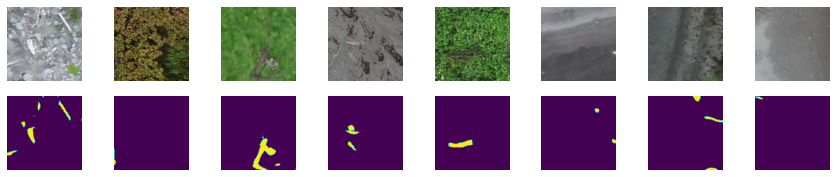


ref:


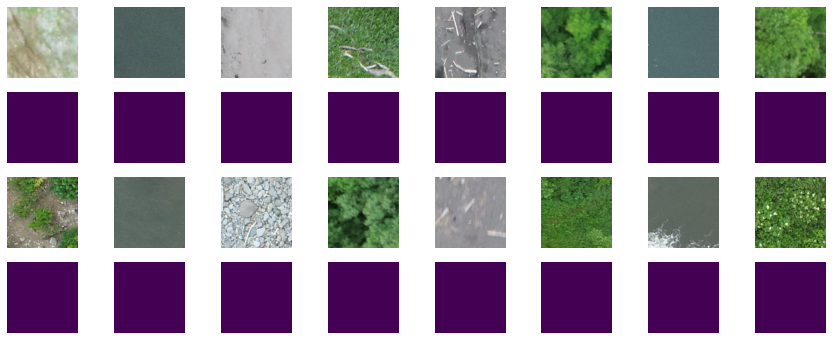


zs:


In [15]:
print('style:')
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(15, 3))
for i, img in enumerate(x_real_style):
    axes[0, i].imshow(style_unnormalize(img[:3]).permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[1, i].imshow(img[3:].permute(1, 2, 0))
    axes[1, i].axis('off')
plt.show()

print('\ngim:')
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(15, 3))
for i, img in enumerate(x_real_gim):
    axes[0, i].imshow(gim_unnormalize(img[:3]).permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[1, i].imshow(img[3:].permute(1, 2, 0))
    axes[1, i].axis('off')
plt.show()

print('\nref:')
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(15, 6))
for i, (img, img2) in enumerate(zip(x_ref, x_ref2)):
    axes[0, i].imshow(gim_unnormalize(img[:3]).permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[1, i].imshow(img[3:].permute(1, 2, 0))
    axes[1, i].axis('off')
    axes[2, i].imshow(gim_unnormalize(img2[:3]).permute(1, 2, 0))
    axes[2, i].axis('off')
    axes[3, i].imshow(img2[3:].permute(1, 2, 0))
    axes[3, i].axis('off')
plt.show()

print('\nzs:')
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(15, 3))
for i, (img, img2) in enumerate(zip(z_trg, z_trg2)):
    axes[0, i].imshow(img[:, None, None])
    axes[0, i].axis('off')
    axes[1, i].imshow(img2[:, None, None])
    axes[1, i].axis('off')
plt.show()

In [16]:
len(gim_dataset)

39000

In [17]:
len(style_dataset)

175002

In [18]:
len(reference_style_style_dataset)

175002

In [21]:
gim_transform_non_random = transforms.Compose([
    transforms.Resize([img_size, img_size]),
    transforms.Normalize(mean=255 / 2, std=255 / 2)
])

gim_dataset = GIMDataset(root=gim_dir, formats=['npy'], th=0.5, transform=gim_transform_non_random)

mask_pixels = 0
ground_pixels = 0
common_pixels = 0

for i, (img, t) in enumerate(gim_dataset):
    mask = img[3:]
    
    mask_pixels += torch.sum(mask).to(int).item()
    ground_pixels += torch.sum(1 - mask).to(int).item()
    common_pixels += np.prod(mask.shape)
    if (i + 1) % 20000 == 0:
        print(i)
        print('P_mask = ', round(mask_pixels / common_pixels, 3))
        print('P_ground = ', round(ground_pixels / common_pixels, 3))

print(mask_pixels)
print(ground_pixels)
print(common_pixels)

19999
P_mask =  0.026
P_ground =  0.974
63741691
2492162309
2555904000
